# Diabetes dataset supervised learning

Team Orange: Eino Kanerva, Aapo Saavalainen, and Mikko Sipola

Dataset: diabetes, [source](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)

Challenges for partner team:

**Task 1:** The scaling of the data is rather odd. In general, we don't need to scale data for simple regression model. Check if using original data from [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) changes anything for our results and interpretation.

**Task 2:** Do the distributions of different variables differ between genders? Does gender have an effect in regression?

**Task 3:** Hyperparameter tuning for decision tree. We would be interested to see optimal model for this data.

### Loading libraries

In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

### Read data

In [144]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [145]:
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names

In [146]:
#create data frame from diabetes data
df = pd.DataFrame(data=X,columns=names)
df.loc[df["sex"] == 0.0506801187398187, "sex"] = 1
df.loc[df["sex"] == -0.044641636506989, "sex"] = 0
df['sex'] = df['sex'].astype('category')
df.loc[:,"prog"] = y #add diabetes progression to data frame
df.head() #check a few rows from data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,prog
0,0.038076,1.0,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,0.0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,1.0,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,0.0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,0.0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [148]:
df.sex.value_counts()/len(df) #proportions of genders

0.0    0.531674
1.0    0.468326
Name: sex, dtype: float64

<AxesSubplot:>

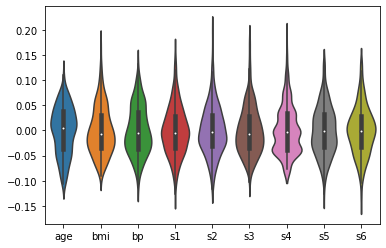

In [143]:
sns.violinplot(data=df.iloc[:,:-1])

### Linear regression model

In [45]:
from sklearn.model_selection import train_test_split

X = diabetes.data 
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [46]:
for s in (X_train, y_train, X_test, y_test):
    print(s.shape)

(353, 10)
(353,)
(89, 10)
(89,)


In [47]:
linreg = LinearRegression()
model = linreg.fit(X_train,y_train)

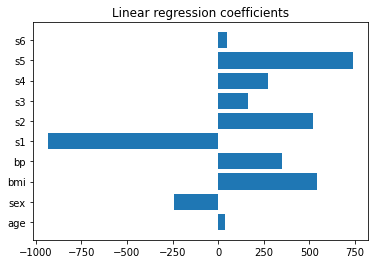

In [94]:
# visualize the coefficients
plt.barh(range(model.coef_.shape[0]),model.coef_)
plt.yticks(ticks=range(10),labels=diabetes.feature_names)
plt.title("Linear regression coefficients")
plt.show()

In [54]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 37.90031
Feature: 1, Score: -241.96625
Feature: 2, Score: 542.42575
Feature: 3, Score: 347.70831
Feature: 4, Score: -931.46126
Feature: 5, Score: 518.04406
Feature: 6, Score: 163.40353
Feature: 7, Score: 275.31004
Feature: 8, Score: 736.18910
Feature: 9, Score: 48.67112


In [58]:
pred = linreg.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, pred))

Mean squared error: 2900.17
Coefficient of determination: 0.45


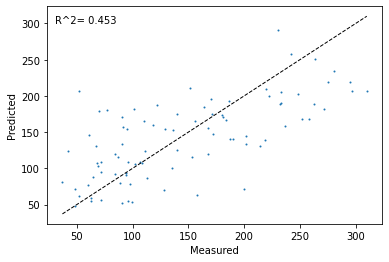

In [89]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred,s=1)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
ax.text(30,300,"R^2= %.3f" % r2_score(y_test, pred))
plt.show()

### Decision tree model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [38]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.5, random_state=42)

In [39]:
model=DecisionTreeClassifier()
parameters={'criterion':["entropy"], 'splitter':["best"], 'max_depth':[2,3,4], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2]}

In [65]:
dankmemes=GridSearchCV(model, parameters)

In [86]:
#dankmemes.best_params_

ValueError: Invalid parameter criterion for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=58120cee-a96d-431f-b1b0-fbb581c5808e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>